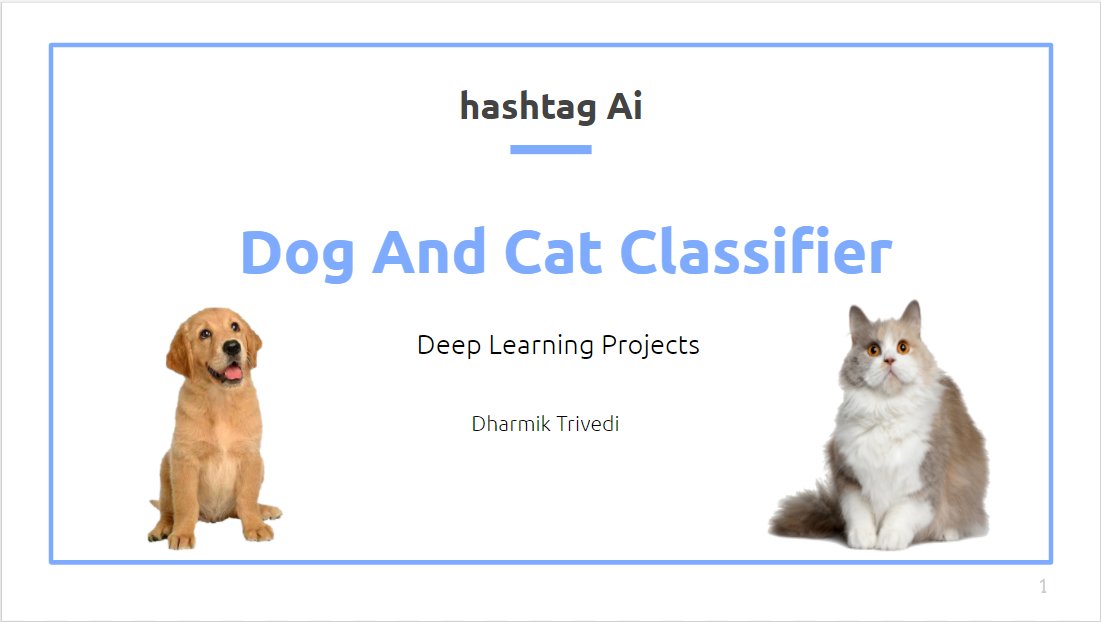

# Install all Library

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# We go through five steps for this project
Step-1 :- Data Gathering

Step-2 :- Data Visualization and Cleaning

Step-3 :- Model Building or train model

Step-4 :- Model save

step-5 :- Test model

# Step-1 :- Data Gathering

Kaggle dataset link:

https://www.kaggle.com/c/dogs-vs-cats/data


In [3]:
# Load Data


train = sum(len(files) for _, _, files in os.walk(r'Dog-Cat-Data/train'))
test = sum(len(files) for _, _, files in os.walk(r'Dog-Cat-Data/test'))

print('Number of train images: {} \nNumber of test images: {} '.format(train,test))

Number of train images: 8007 
Number of test images: 2024 


# Step-2 :- Data Visualization and Cleaning

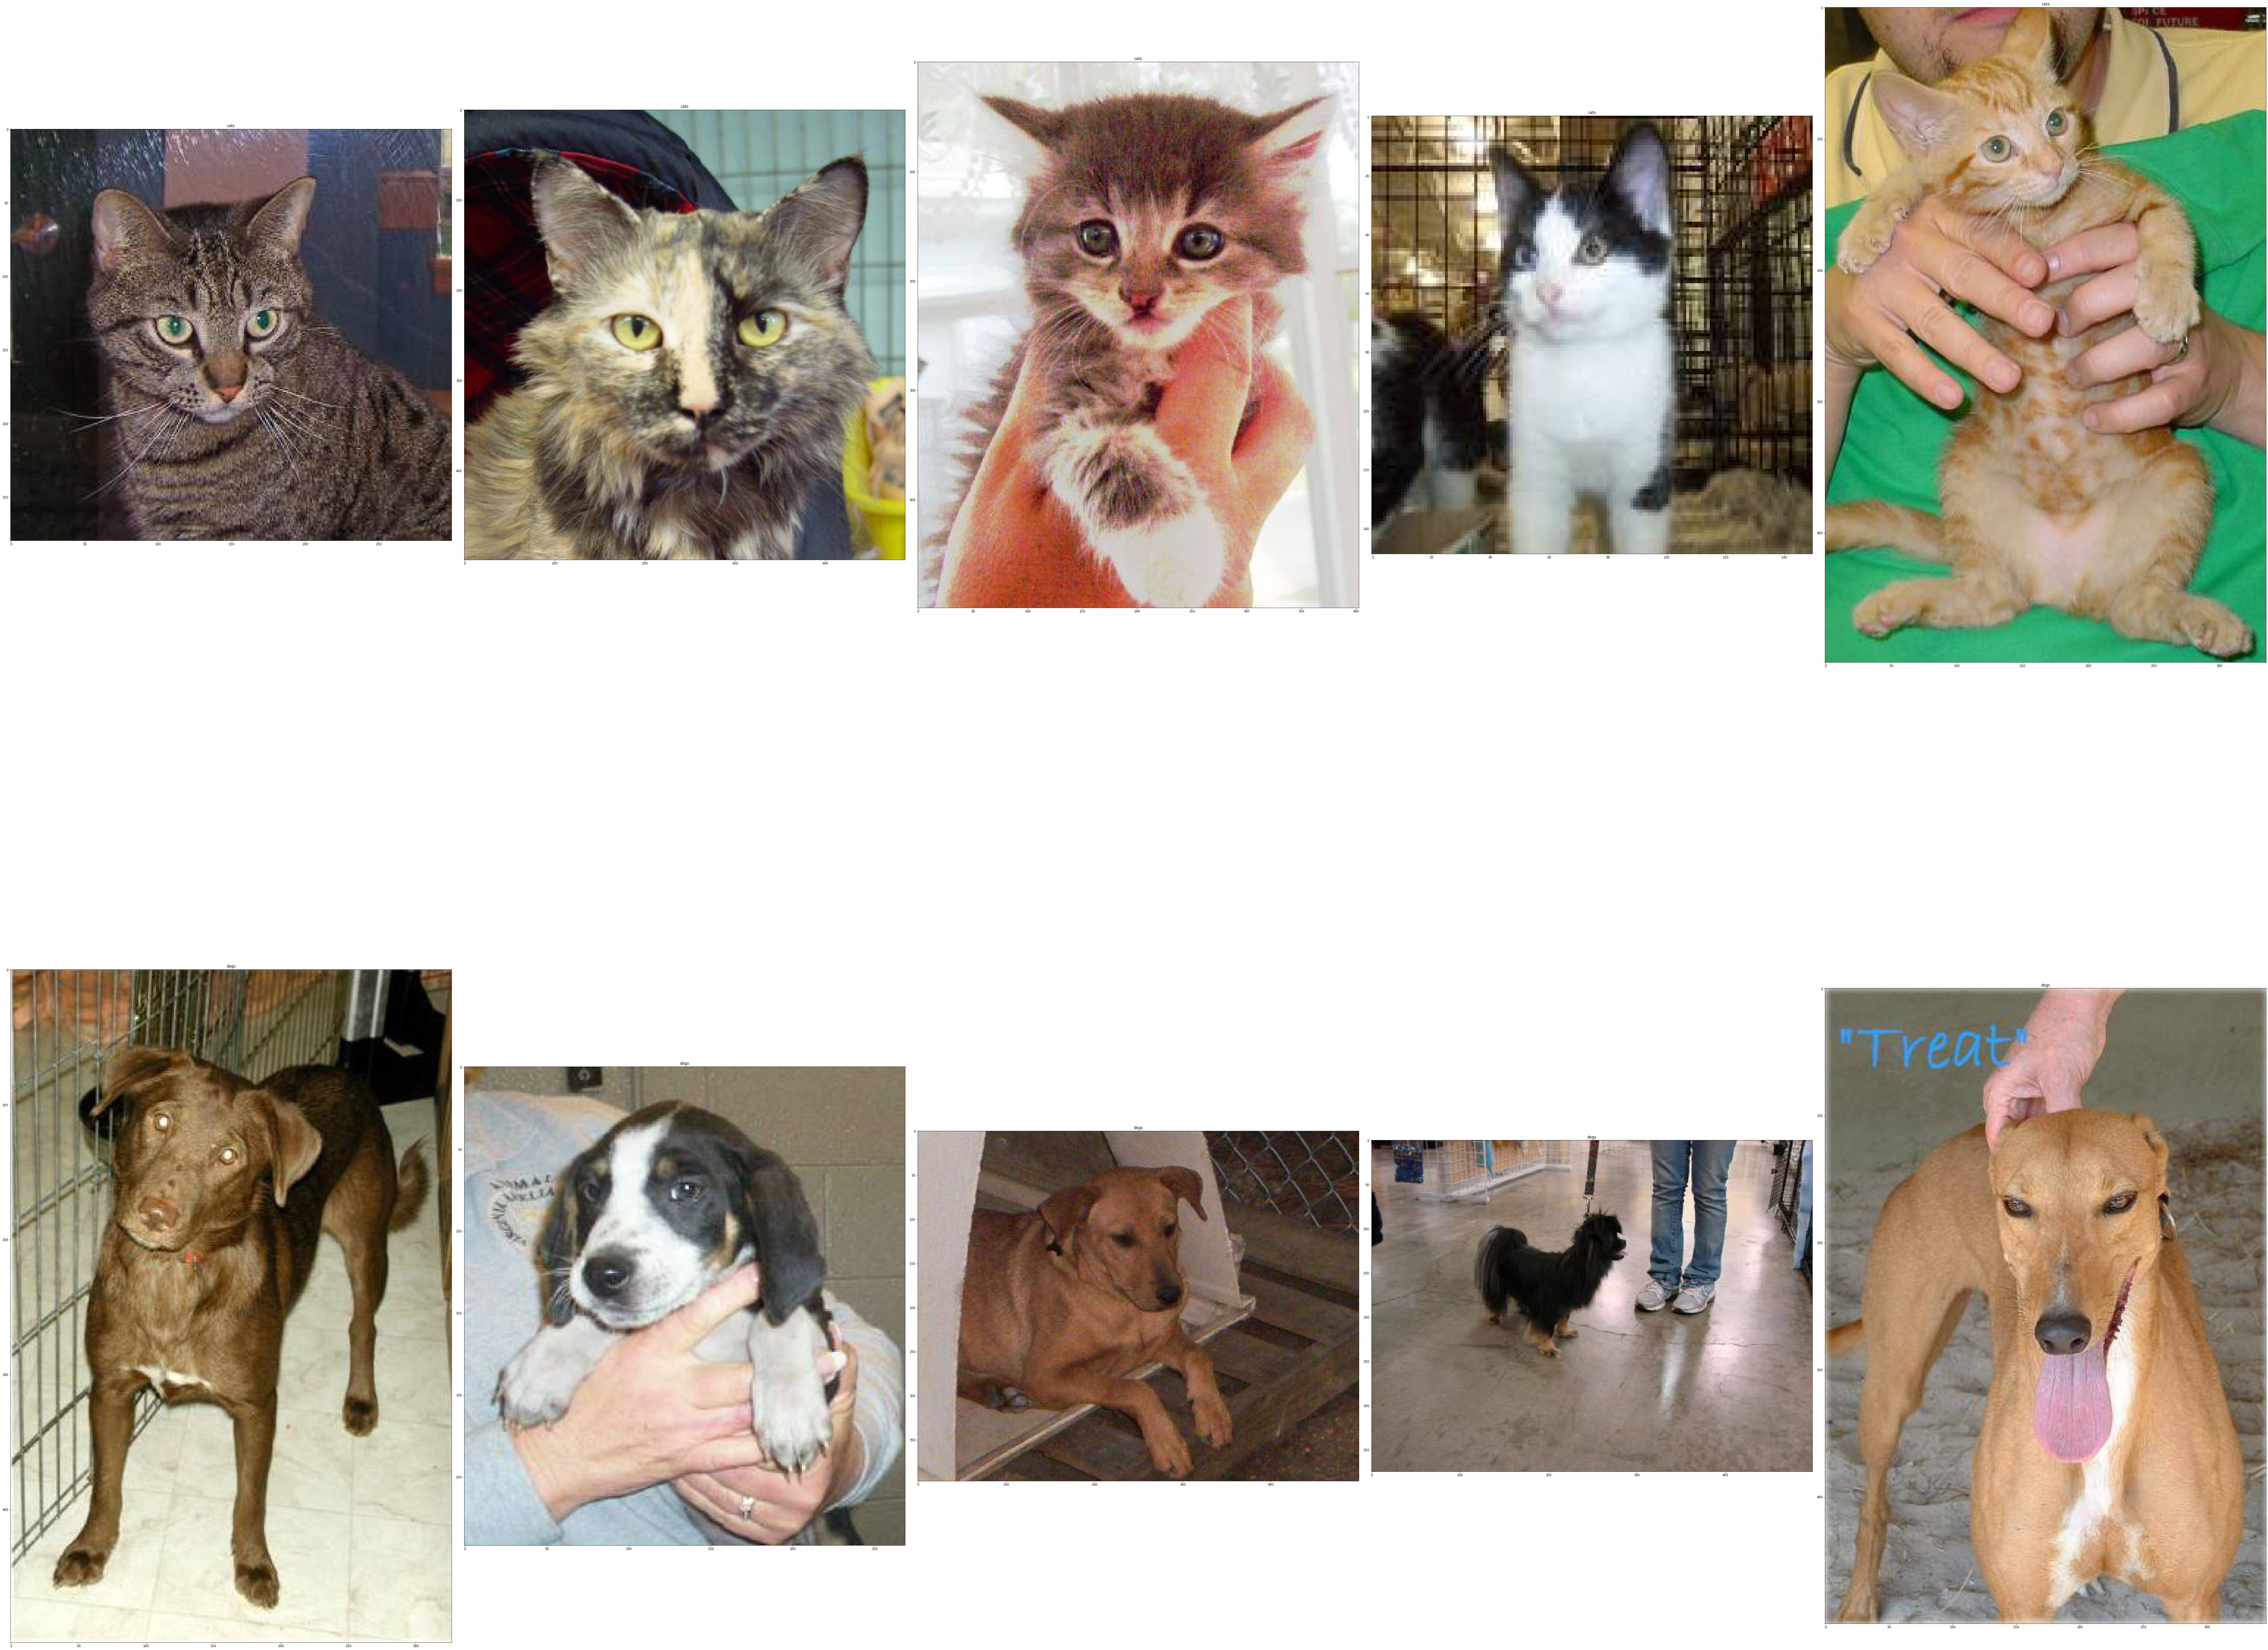

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(100, 100))
count = 0
# for every class in the dataset
for i in os.listdir('./Dog-Cat-Data/train'):
    # get the list of all images that belong to a particular class
    train_class = os.listdir(os.path.join('Dog-Cat-Data/train', i))

    # plot 5 images per class
    for j in range(5):
        img = os.path.join('Dog-Cat-Data/train', i, train_class[j])
        axs[count][j].title.set_text(i)
        axs[count][j].imshow(Image.open(img))
    count += 1
fig.tight_layout()
plt.show()

Number of images in cats=4001

Number of images in dogs=4006



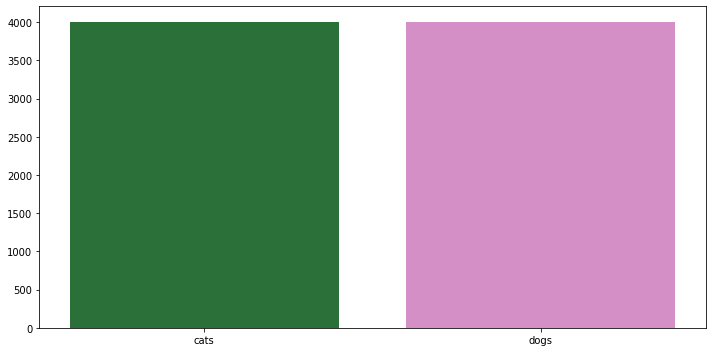

In [5]:
No_images_per_class = []
Class_name = []
for i in os.listdir('./Dog-Cat-Data/train'):
  Class_name.append(i)
  train_class = os.listdir(os.path.join('Dog-Cat-Data/train',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  No_images_per_class.append(len(train_class))

fig = plt.figure(figsize=(10,5))
plt.bar(Class_name, No_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()
plt.show()

# Step-3 Model Building or train model

cnn start

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dog-Cat-Data/train',
                                                 target_size = (256, 256),
                                                 batch_size = 10,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Dog-Cat-Data/test',
                                            target_size = (256, 256),
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


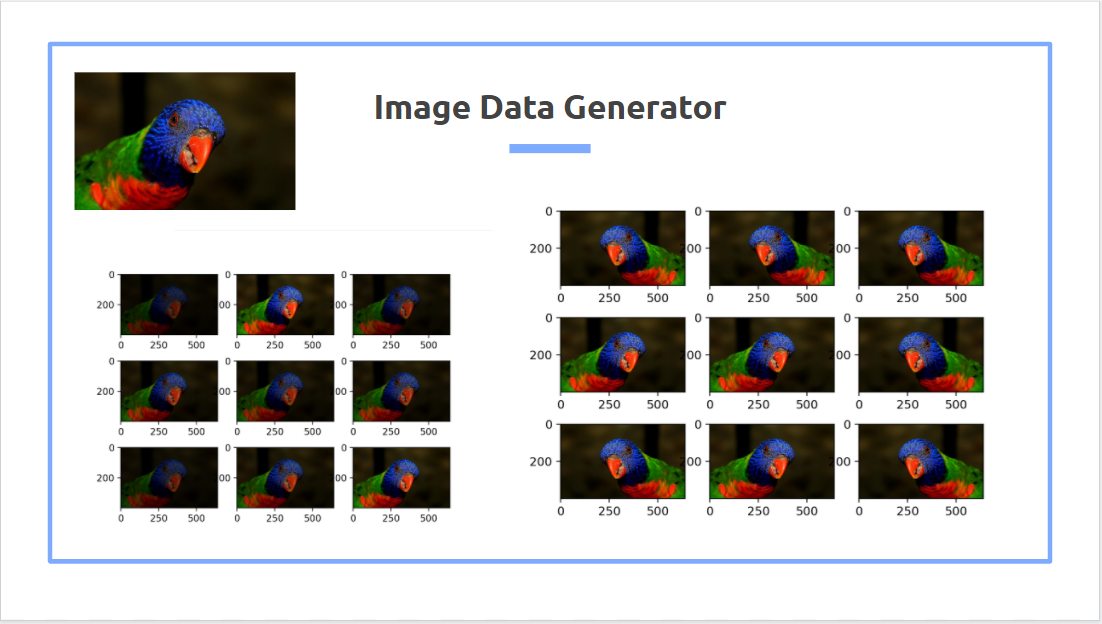

In [7]:
# Create Neural Network

model = Sequential()

# Input Layer
# Hidden Layer
# Outputlayer

model.add(Conv2D(16, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


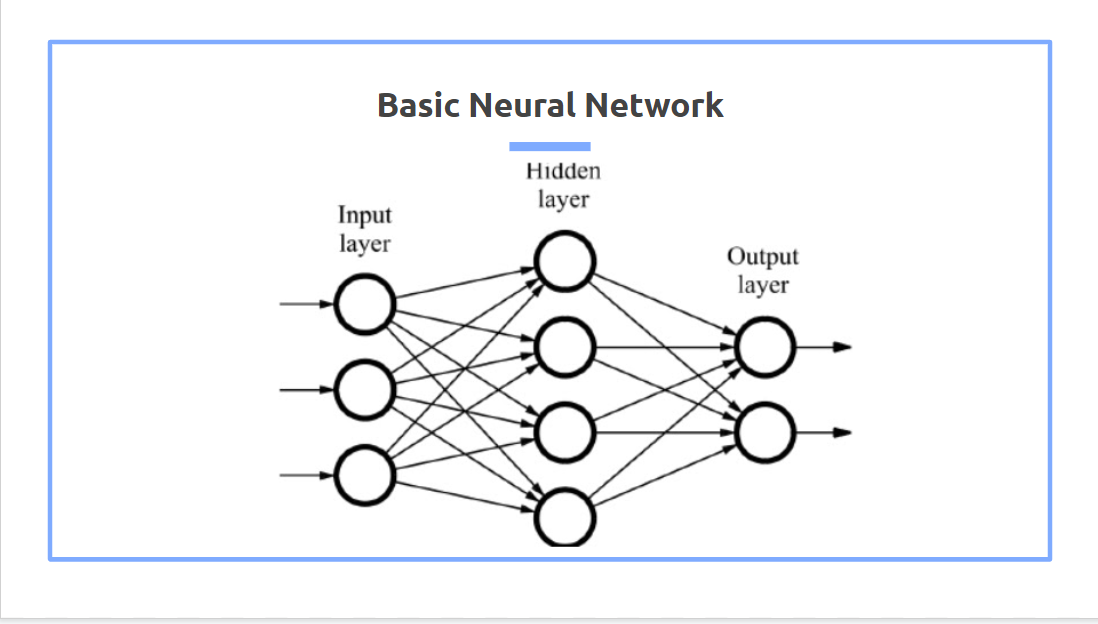

 #                                                    Convo Layer

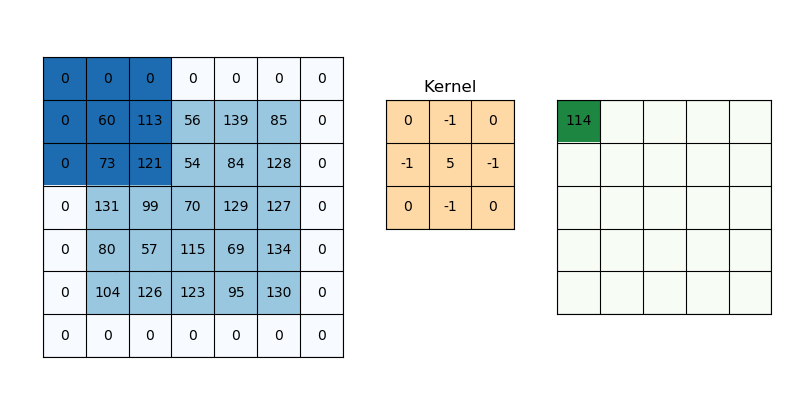

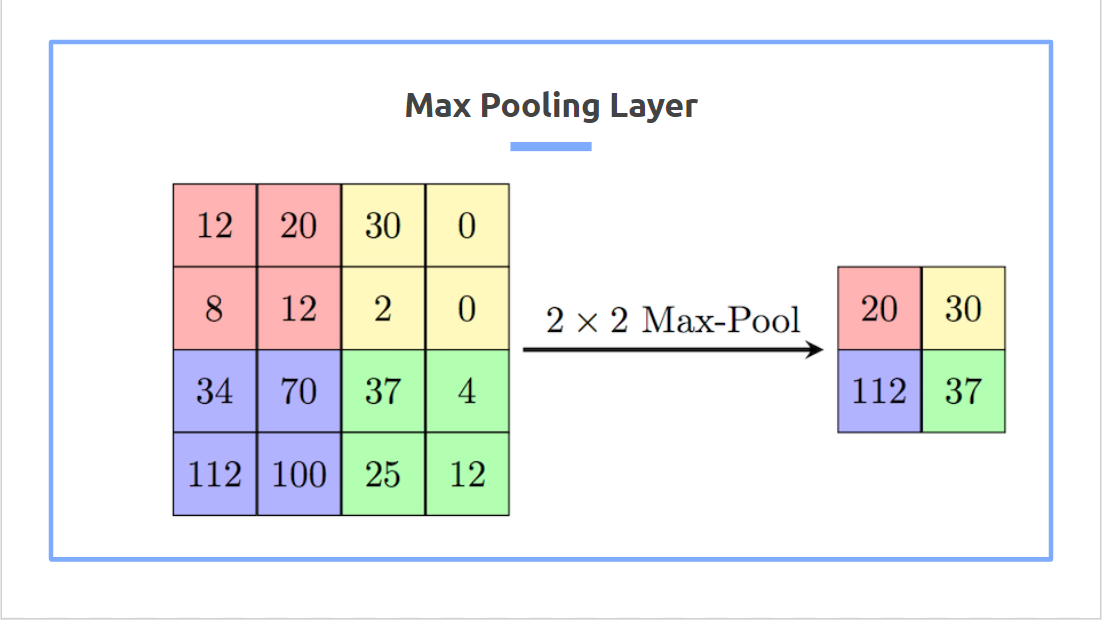

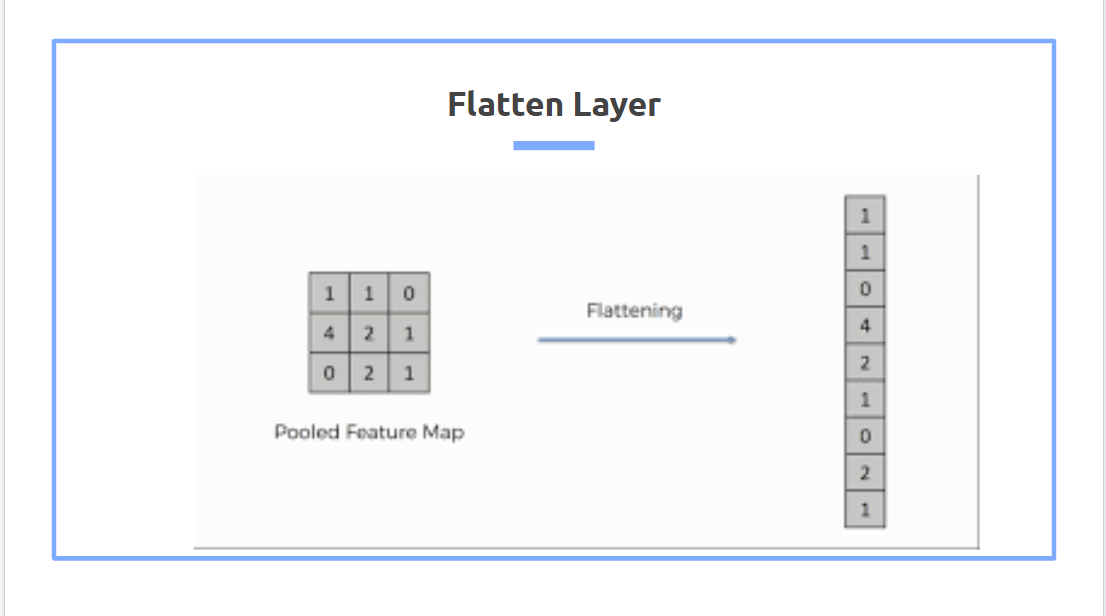

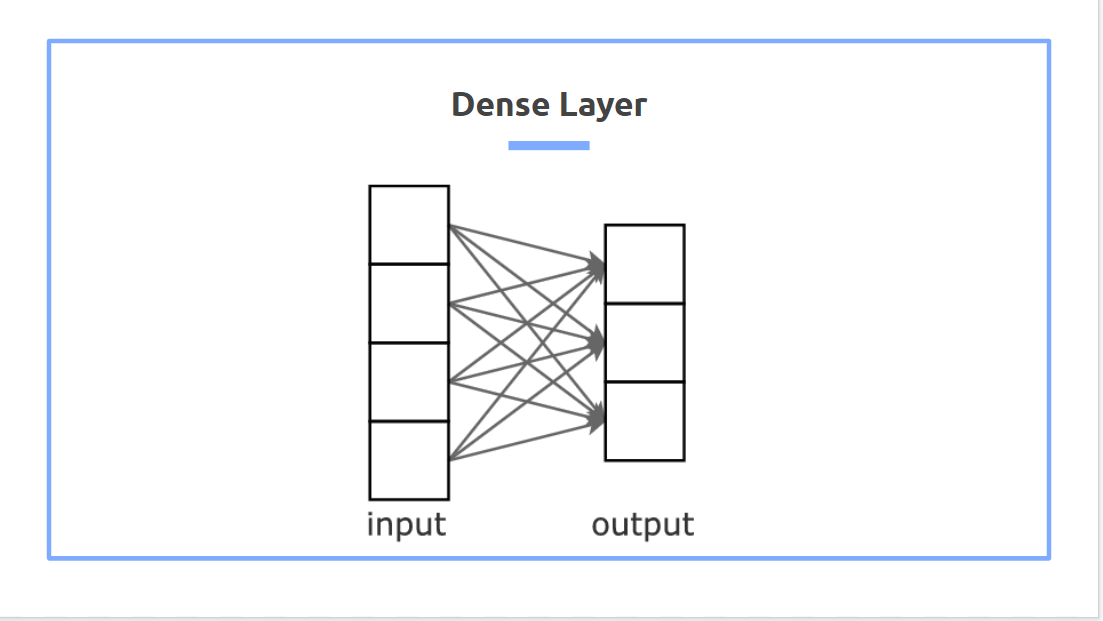

In [8]:
# Training a model

history = model.fit_generator(training_set,
                              epochs=5,
                              verbose=1,
                              validation_data=test_set)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
801/801 [==============================] - 985s 1s/step - loss: 0.7085 - accuracy: 0.5597 - val_loss: 0.6551 - val_accuracy: 0.6377
Epoch 2/5
801/801 [==============================] - 592s 739ms/step - loss: 0.6406 - accuracy: 0.6395 - val_loss: 0.6113 - val_accuracy: 0.6634
Epoch 3/5
801/801 [==============================] - 470s 587ms/step - loss: 0.5976 - accuracy: 0.6877 - val_loss: 0.6047 - val_accuracy: 0.6866
Epoch 4/5
801/801 [==============================] - 469s 585ms/step - loss: 0.5590 - accuracy: 0.7164 - val_loss: 0.5516 - val_accuracy: 0.7222
Epoch 5/5
801/801 [==============================] - 470s 587ms/step - loss: 0.5329 - accuracy: 0.7350 - val_loss: 0.5612 - val_accuracy: 0.7217


# Step-4 Model save

Save into h5 model

In [9]:
model.save("dog-cat-1.h5")
print("Saved model to disk")

Saved model to disk


# step-5 Test model

In [10]:
model.load_weights('dog-cat-1.h5')

evaluate = model.evaluate_generator(test_set, steps = test_set.n // 32, verbose =1)
print('Accuracy Test : {}'.format(evaluate[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
63/63 [==============================] - 7s 116ms/step - loss: 0.5893 - accuracy: 0.6889
Accuracy Test : 0.6888889074325562


In [11]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dog.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

dog
